<a href="https://colab.research.google.com/github/JoshRome/ai_course/blob/master/HW2/HW2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2: Problem 2

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

Our function that we will use to demonstrate  gradient descent

In [0]:
def funct(x1, x2):
  return 8 + 2 * x1 + 9 * x2

#Generate Random Points
We will create random points at $(x_1,x_2,y)$

In [0]:
m = 100
x1 = 2 * np.random.rand(m, 1)
x2 = 2 * np.random.rand(m, 1)
y = funct(x1, x2) + np.random.rand(m, 1)

We shall plot the randomly generated set of points and the function:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'color'
  if __name__ == '__main__':


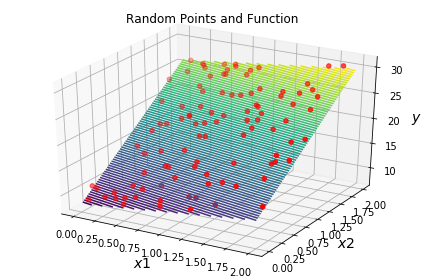

In [16]:
x1_dim = np.linspace(0, 2, 30)
x2_dim = np.linspace(0, 2, 30)
X1, X2 = np.meshgrid(x1_dim, x2_dim)
Y = funct(X1, X2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour3D(X1, X2, Y, 100 ,color='black')

ax.scatter3D(x1, x2, y, color='red')

ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$y$')
ax.set_title('Random Points and Function')

plt.tight_layout()

#Hyperparameters

In [0]:
epochs = 100

lr = 0.01

batchSize = 4

initialWeight = np.random.randn(3,1)

We will use these hyperparameters operate mini-batch gradient descent

In [0]:
x = np.column_stack([np.ones(shape=(m,1)), x1,x2])

weight = initialWeight

weightPath_MGD = []
weightPath_MGD.append(weight)

for epoch in range(epochs):
  indexes = np.random.permutation(m)
  XIndexes = x[indexes]
  YIndexes = y[indexes]

  for i in range (0, m, batchSize):
    xi = XIndexes[i:i+batchSize]
    yi = YIndexes[i:i+batchSize]
    gradient = 1 / batchSize * xi.T.dot(xi.dot(weight) - yi)
    weight = weight - lr * gradient
    weightPath_MGD.append(weight) 

Now we will see what the final weights are from the MBGD

In [19]:
weightPath_MGD[-1]

array([[8.35070838],
       [2.04773628],
       [9.11091223]])

Now we will plot the data points on a 2D plane and its predictions as followed: 

(2500, 3, 1)


Text(0.5, 0, 'y')

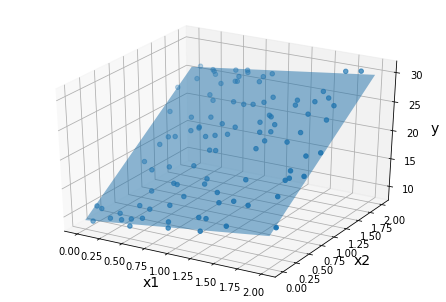

In [28]:
fig = plt.figure(1)
ax = Axes3D(fig)

(X1,X2) = np.meshgrid(np.array([0,2]), np.array([0,2]))
print(np.shape(weightPath_MGD[1:]))

ax.scatter(x1, x2, y)

yhat = lambda x,y:(weightPath_MGD[-1][2] + (x * weightPath_MGD[-1][1]) + (weightPath_MGD[-1][0] * y))
ax.plot_surface(X1,X2, yhat(X1,X2), alpha = 0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

#Sources:
https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-
